## Features of dataset:
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   0: Typical angina: chest pain related decrease blood supply to the heart
   1: Atypical angina: chest pain not related to heart
   2: Non-anginal pain: typically esophageal spasms (non heart related)
   3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
   anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   serum = LDL + HDL + .2 * triglycerides
   above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
   0: Nothing to note
   1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    .looks at stress of heart during excercise
    .unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    .colored vessel means the doctor can see the blood passing through
    .the more blood movement the better (no clots)
13. thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [1]:
#import all tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay,roc_curve
from sklearn.metrics import auc,ConfusionMatrixDisplay

In [2]:
df=pd.read_csv("./Dataset/heart-disease.csv")
df.shape

(303, 14)

<Axes: xlabel='target'>

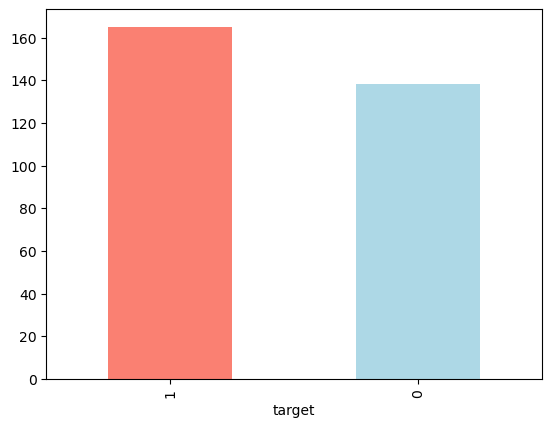

In [3]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [4]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# comparison
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


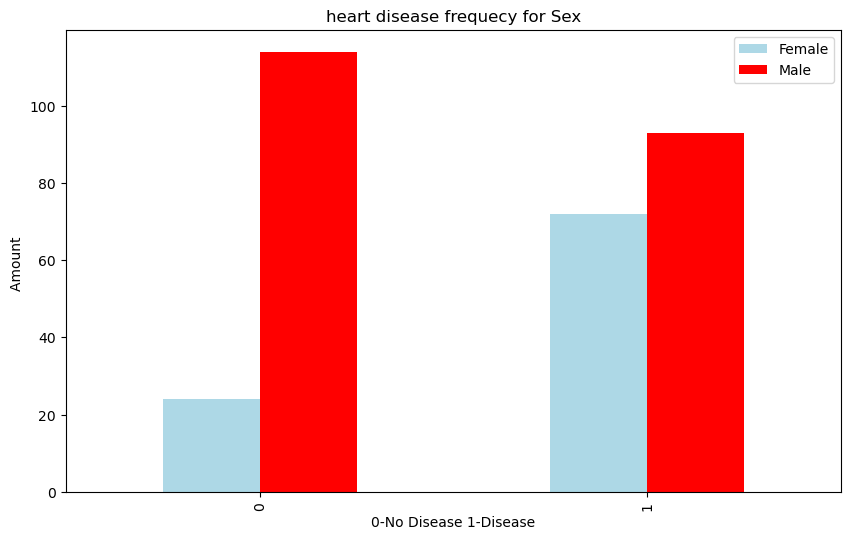

In [7]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["lightblue","red"])
plt.title("heart disease frequecy for Sex")
plt.xlabel("0-No Disease 1-Disease")
plt.ylabel("Amount ")
plt.legend(["Female","Male"]);


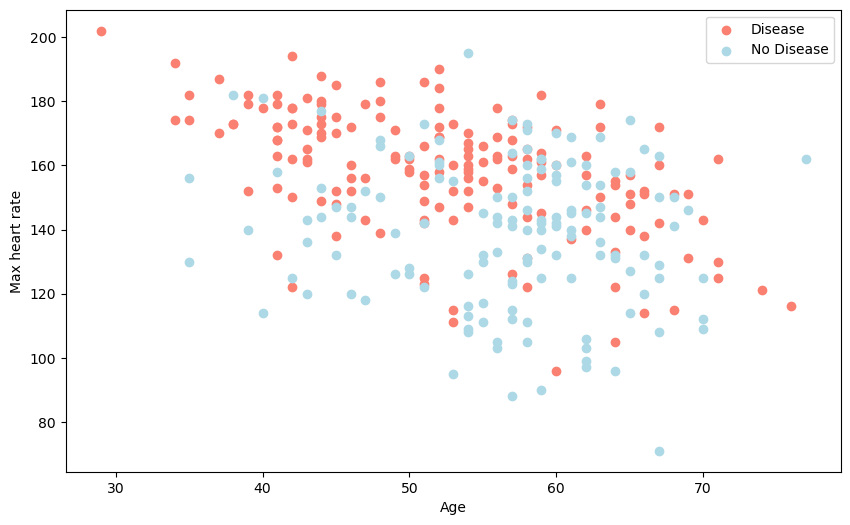

In [8]:
# age vs max heart rate
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No Disease"]);

<Axes: ylabel='Frequency'>

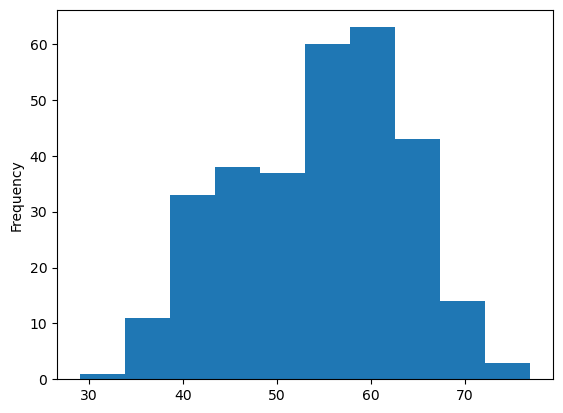

In [9]:
df.age.plot.hist()

In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

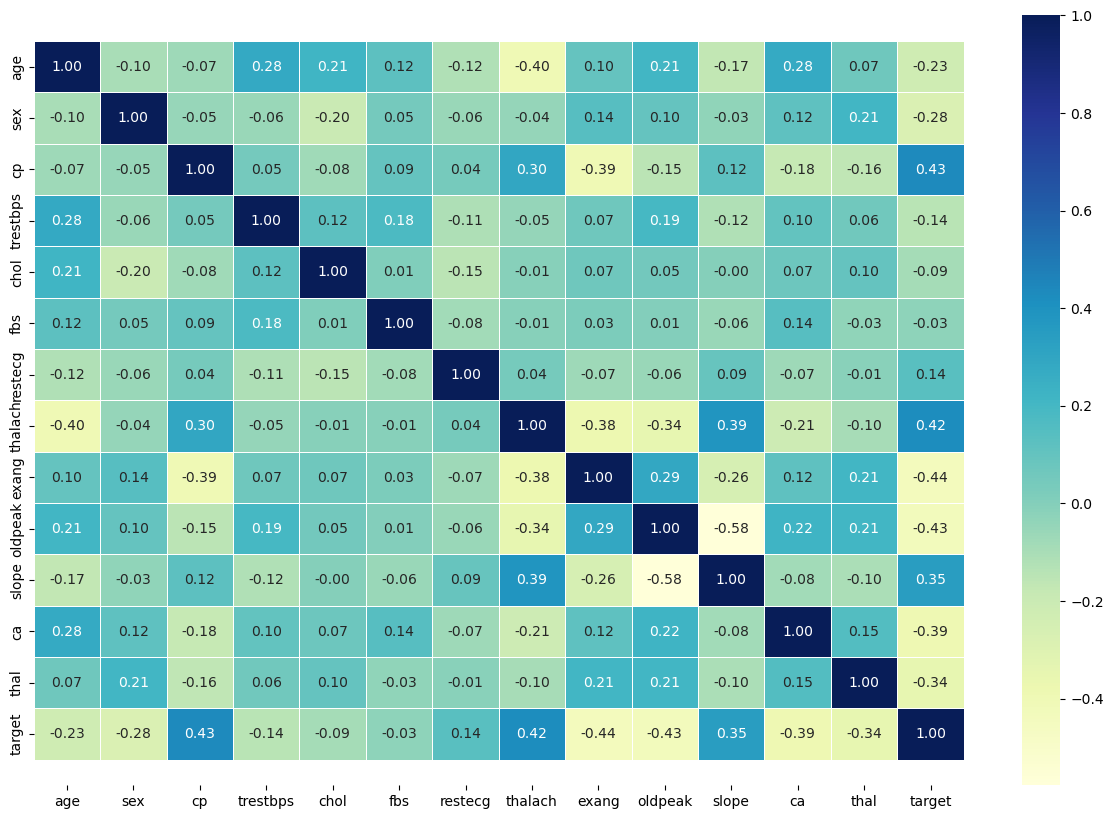

In [11]:
#correlation matrix
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt="0.2f",cmap="YlGnBu")

bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

In [12]:
#split the data
x=df.drop("target",axis=1)
y=df["target"]

In [13]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [15]:
np.random.seed(42)
# split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)



In [16]:
len(X_test)

61

# 3 models
1. Logstic regression
2. K-nearest Classifier
3. RandomForestClassifier


In [17]:
 # models in a dictionary
models={"Logistic regression": LogisticRegression(),
           "2. K-nearest Classifier": KNeighborsClassifier(),
           "Random Forest Classifier": RandomForestClassifier()}
    

def fit_score(X_train,X_test,y_train,y_test,models):
    np.random.seed(42)
    
    models_score={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        
        models_score[name]=model.score(X_test,y_test)
        
    return models_score

In [18]:
model_scores=fit_score(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,models=models)

model_scores

/home/saumyaryan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8852459016393442,
 '2. K-nearest Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

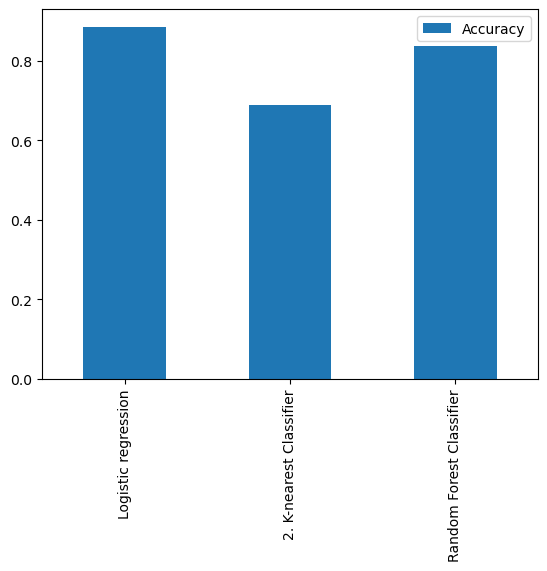

In [19]:
compare=pd.DataFrame(model_scores,index=["Accuracy"])
compare.T.plot.bar();

## Hyperparameter tuning

In [20]:
# 1- KNN model
train_scores=[]
test_scores=[]


neighbour=range(1,30)

knn=KNeighborsClassifier()

for i in neighbour:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_test,y_test))
    

In [21]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058,
 0.6859504132231405,
 0.6694214876033058,
 0.7024793388429752,
 0.6735537190082644,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818]

In [22]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361]

In [23]:
max_test_accuracy=max(test_scores)*100
max_train=max(train_scores)*100
max_test_accuracy,max_train


(75.40983606557377, 100.0)

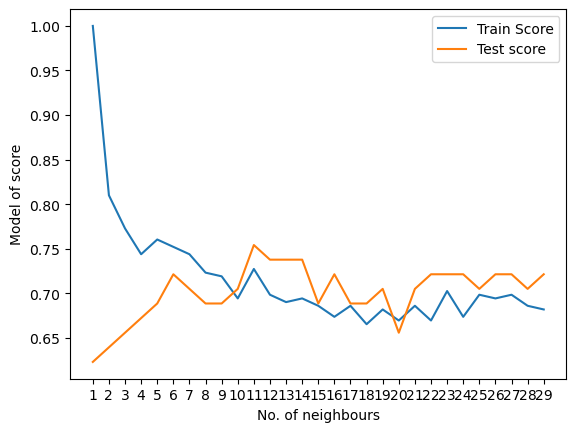

In [24]:
plt.plot(neighbour,train_scores,label="Train Score")
plt.plot(neighbour,test_scores,label="Test score")
plt.xticks(np.arange(1,30,1))
plt.xlabel("No. of neighbours")
plt.ylabel("Model of score")
plt.legend()

## hyperParameter tuning with RandomizedSearchCV for both logisticRegression  and RandomForestClassifier`


In [25]:
# grid for logistic regression
logr_grid={"C":np.logspace(-4,4,20),
          "solver":["liblinear"]}

#grid for Random forest
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [26]:
#tuning logistic regression
np.random.seed(42)

rs_logr_grid=RandomizedSearchCV(LogisticRegression(),
                               param_distributions=logr_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_logr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_logr_grid.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [28]:
rs_logr_grid.score(X_test,y_test)

0.8852459016393442

In [29]:
#tuning random forest classifier
np.random.seed(42)

rf=RandomizedSearchCV(RandomForestClassifier(),
                     param_distributions=rf_grid,
                     cv=5,
                     n_iter=20,
                     verbose=True)

rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [31]:
rf.score(X_test,y_test)

0.8688524590163934

## hyperParameter tuning with GridSearchCV for both logisticRegression  and RandomForestClassifier

In [32]:
##tuning logistic regression
log_gs_grid={"C":np.logspace(-4,4,30),
          "solver":["liblinear"]}

np.random.seed(42)

gs_logr_grid=GridSearchCV(LogisticRegression(),
                                param_grid=log_gs_grid,
                               cv=5,
                               verbose=True)

gs_logr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
gs_logr_grid.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [34]:
gs_logr_grid.score(X_test,y_test)

0.8852459016393442

In [35]:
model_scores

{'Logistic regression': 0.8852459016393442,
 '2. K-nearest Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

In [36]:
#evaluating the model logistic regression
y_preds=gs_logr_grid.predict(X_test)
len(y_preds)


61

In [37]:
len(y_test)

61

In [38]:
from sklearn import metrics

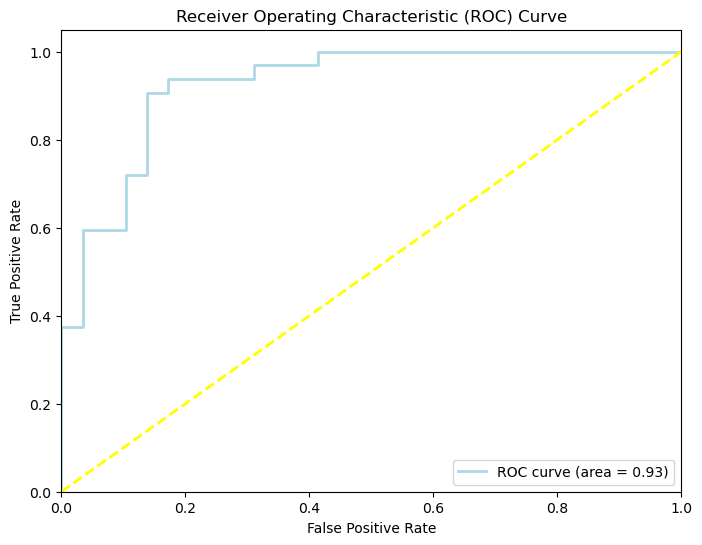

In [39]:
y_score = gs_logr_grid.predict_proba(X_test)[:,1] # probability estimates of the positive class
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [40]:
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]])

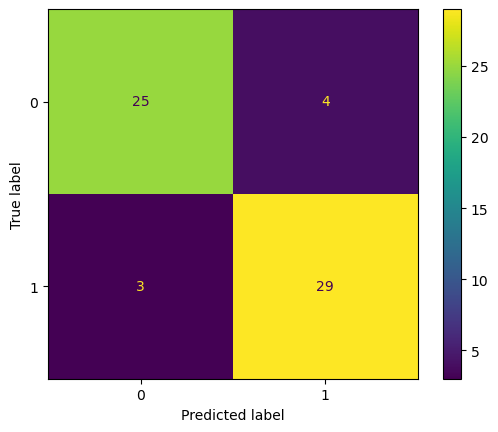

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

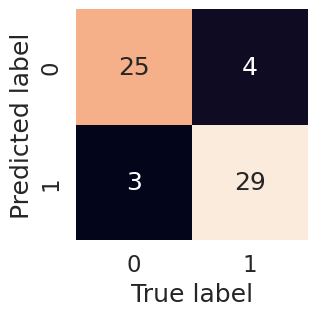

In [42]:
sns.set(font_scale=1.5)

def plot_confmat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_confmat(y_test,y_preds)

In [45]:
#classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [46]:
gs_logr_grid.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
#new classifier with best params
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")

In [52]:
#accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [51]:
cv_acc.mean()

0.8446994535519124

In [53]:
#precision
cv_pre=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [55]:
cv_pre.mean()

0.8207936507936507

In [54]:
#recall
cv_rec=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_rec

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [56]:
cv_rec.mean()

0.9212121212121213

In [57]:
#f1-score
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [58]:
cv_f1.mean()

0.8673007976269721

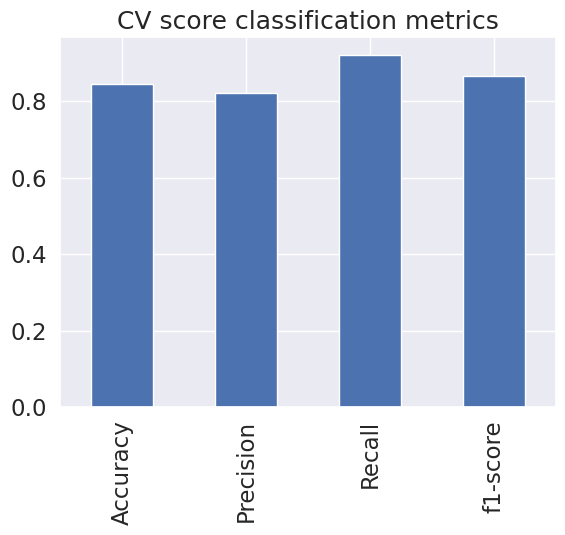

In [71]:
#all cv matrix
cv_metrics=pd.DataFrame({"Accuracy":cv_acc.mean(),"Precision":cv_pre.mean(),"Recall":cv_rec.mean(),"f1-score":cv_f1.mean()},index=[0])
cv_metrics.T.plot.bar(title="CV score classification metrics",
                     legend=False);